### Monte Carlo Simulation: Dice Simulation

#### In this simulation we will look at a dice game simulation with a bettor betting virtual money!

First, we create a model for the dice:

In [1]:
%matplotlib inline
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Dice Class
class Dice:
    
    def __init__(self, sides):
        self.sides = sides
           
    def roll(self):
        return random.randint(1, self.sides)
        
d = Dice(6)

# for i in range(100):
#     print("Dice Roll: {:d}".format(d.roll()))

Now, we create a bettor who will bet money on the dice:

In [12]:
class Bettor:
    
    def __init__(self, money, bet, total_bets):
        self.money = money
        self.bet = bet
        self.total_bets = total_bets
        self.history = np.zeros(total_bets)
       
    #Get history from the bettor
    def get_history(self):
        return self.history
    
    # Rules:
    # 1. The roller will roll the dice
    # 2. If dice is 1 or 2, bettor loses
    # 3. If dice is 3 or 4, bettor gets wager back
    # 4. if dice is 5 or 6, bettor gets wager doubled
    
    def eval_game(self, roll):
        if roll is 1 or roll is 2:
            return -1
        elif roll is 3 or roll is 4:
            return 0
        elif roll is 5 or roll is 6:
            return 1
        
    def update_money(self, money, outcome):
        if outcome is -1:
            money -= self.bet
        elif outcome is 1:
            money += self.bet   
        return money
    
    def play_game(self, dice):
        current_money = self.money
        has_money = True
        
        for i in range(self.total_bets):
            if has_money:
                roll = dice.roll()
                outcome = self.eval_game(roll)
                current_money = self.update_money(current_money, outcome)
                self.history[i] = current_money
#                 print('Current Money: {:d}'.format(current_money))
                if current_money <= 0:
                    has_money = False
        

        
dice = Dice(6)        
bettor = Bettor(10, 1, 1000)

bettor.play_game(dice)

Here, we plot the results:

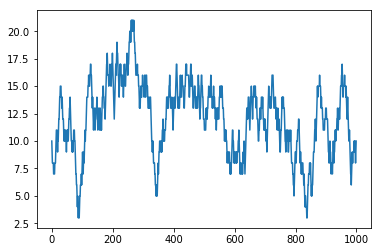

In [13]:
money = bettor.get_history()
sequence = list(range(bettor.total_bets))

# print(sequence)

figs, ax = plt.subplots()
ax.plot(sequence, money)